Importing Dependincies


In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data Collection and Processing

In [59]:
# Loading csv into pandas.

dataset = pd.read_csv("dataset.csv")
dataset.head() # Showing top 5 row of the dataset.


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [60]:
# Statistical Measures
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [61]:
dataset.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [62]:
# label encoding

dataset.replace({"Loan_Status": {'N': 0, 'Y':1}}, inplace=True)
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [63]:
# Dependent Column Values
dataset["Dependents"].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [64]:
dataset = dataset.replace(to_replace="3+", value=4)

In [65]:
dataset["Dependents"].value_counts()

Dependents
0    345
1    102
2    101
4     51
Name: count, dtype: int64

Data Visualization

<Axes: xlabel='Education', ylabel='count'>

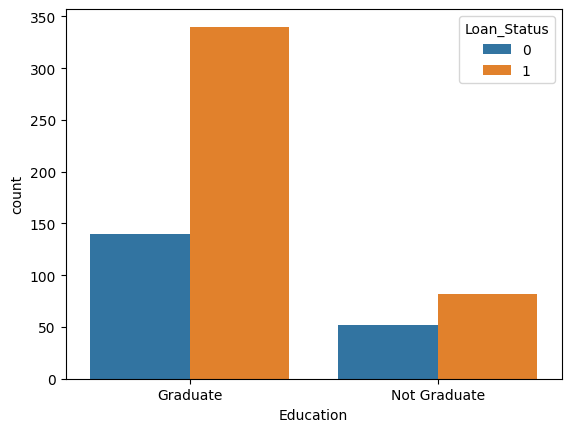

In [66]:
# Education & Loan Status

sns.countplot(x = "Education", hue = "Loan_Status", data = dataset)

<Axes: xlabel='Married', ylabel='count'>

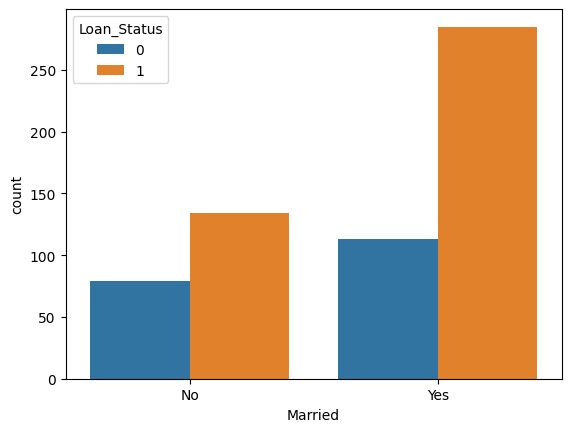

In [67]:
# Martial Status

sns.countplot(x = "Married", hue = "Loan_Status", data = dataset)

In [68]:
# Convert categorical columns to numerical values

dataset.replace({"Married": {"No": 0, "Yes": 1}, "Gender": {"Male": 0, "Female": 1}, "Self_Employed": {"No": 0, "Yes": 1},
                "Property_Area": {"Rural": 0, "Semiurban": 1, "Urban":2}, "Education":{"Graduate" : 1, "Not Graduate": 0}}, inplace=True)

In [69]:
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,2,1
1,LP001003,0.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,0.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,0.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,0.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1.0,0.0,0,1,0.0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,0.0,1.0,4,1,0.0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,0.0,1.0,1,1,0.0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,0.0,1.0,2,1,0.0,7583,0.0,187.0,360.0,1.0,2,1


In [70]:
# Seperating the data and label
dataset.dropna(inplace=True)
X = dataset.drop(columns = ["Loan_ID", "Loan_Status"], axis = 1)
Y = dataset["Loan_Status"]

Train Test Split

In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=2)

In [72]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


Traning the model

In [73]:
classifier = svm.SVC(kernel = "linear")


In [74]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Model Evaluation

In [77]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print(training_data_accuracy)

0.7476851851851852
